In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math

## Dataset
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

### Student Portugese Language Course Performance

In [2]:
students_por = pd.read_csv("student-por.csv")
students_por

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [3]:
# EXPLORING THE DATA
students_por.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [4]:
students_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Initial Data Visualization

[Text(0.5, 1.0, 'Student Portugese Course Absences vs Workday Alcohol Consumption')]

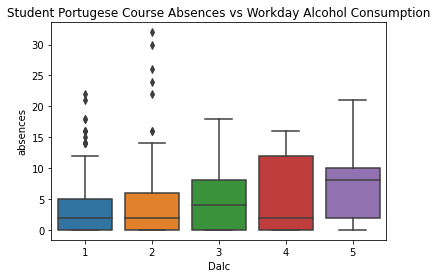

In [5]:
sns.boxplot(data=students_por, x='Dalc', y='absences').set(title='Student Portugese Course Absences vs Workday Alcohol Consumption')

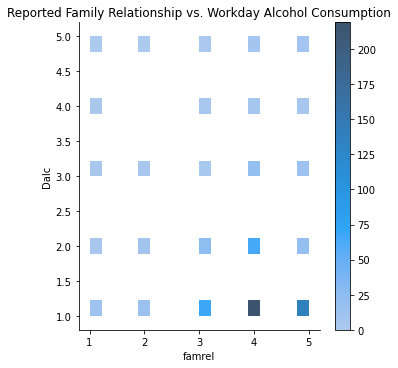

In [6]:
sns.displot(data=students_por, x="famrel", y="Dalc", cbar=True).set(title='Reported Family Relationship vs. Workday Alcohol Consumption')

Below shows two histograms that show alcohol consumption during the work week and alcohol consumptiond during the weekend. It can be seen that students drink much more on the weekend.

The third histogram shows the distribution of absences from all students.

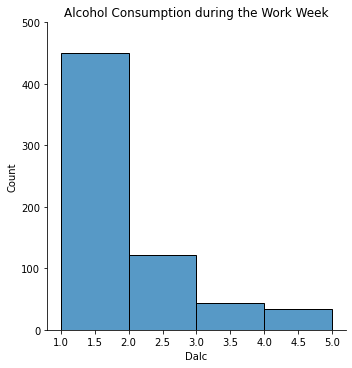

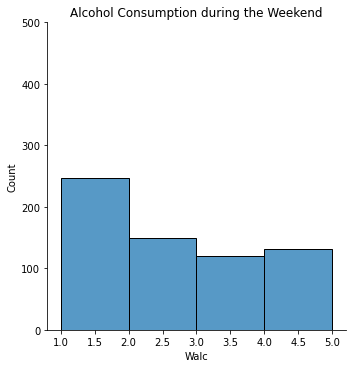

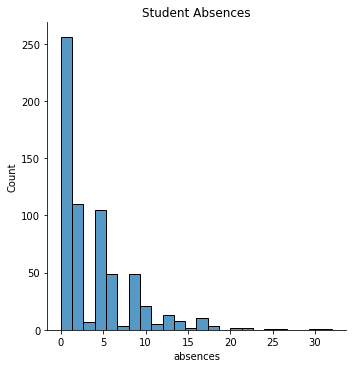

In [7]:
sns.displot(data = students_por, bins = [1, 2, 3, 4, 5], x = "Dalc").set(ylim = (0, 500)).set(title='Alcohol Consumption during the Work Week')
sns.displot(data = students_por, bins = [1, 2, 3, 4, 5], x = "Walc").set(ylim = (0, 500)).set(title='Alcohol Consumption during the Weekend')
sns.displot(data = students_por, x = "absences").set(title='Student Absences')

Below shows the distribution of final grades dictated by G3

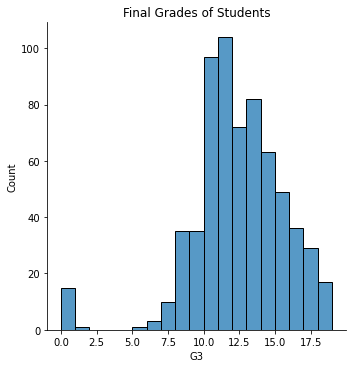

In [8]:
sns.displot(data = students_por, x = 'G3',bins=range(20)).set(title='Final Grades of Students')

In [9]:
# CREATE NEW COLUMN FOR STUDENTS WHOSE ALC CONSUMPTION EXCEEDS 2
mod_data = students_por
mod_data['high_alc_consumption'] = mod_data['Dalc'] >= 3
mod_data['high_alc_consumption'].value_counts()

False    572
True      77
Name: high_alc_consumption, dtype: int64

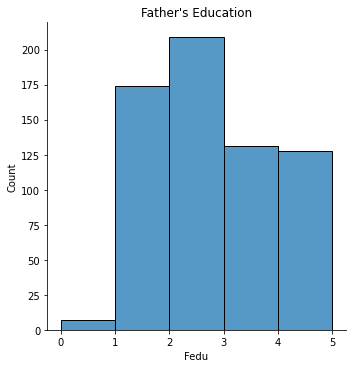

In [10]:
sns.displot(data = students_por, x = 'Fedu',bins=range(6)).set(title='Father\'s Education')

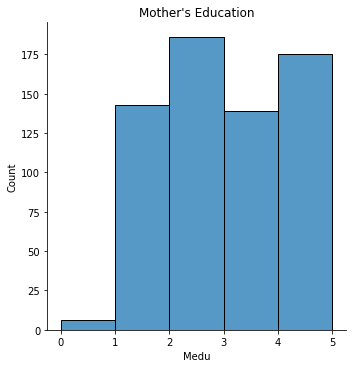

In [11]:
sns.displot(data = students_por, x = 'Medu',bins=range(6)).set(title='Mother\'s Education')

## Bootstrapping and 95% Confidence Intervals

Below, we have created a $95\%$ confidence interval for the average proportion of students who have alcohol consumption scores that exceed 2.

In [12]:
num_bootstraps = 10000
high_alc = mod_data['high_alc_consumption']
bootstrap_samples = np.random.choice(high_alc, size = (num_bootstraps, len(high_alc)), replace = True)
sampling_means = np.average(bootstrap_samples,axis=1)
bootstrap1_L = np.percentile(sampling_means,2.5)
bootstrap1_R = np.percentile(sampling_means,97.5)
high_alc_bootstrap = (bootstrap1_L,bootstrap1_R)
print(high_alc_bootstrap)

(0.09399075500770417, 0.14329738058551617)


Below there are two bootstraps at the 95% confidence interval. The first bootstrap includes Dalc >= 3 which is considered higher alcohol intake. We are 95% confident that the grades of a student with higher alcohol content is between 9.701 and 11.169. 

The second bootstrap incldues Dalc < 3 which is considered lower alcohol intake. We are 95% confident that the grades of a student with lower alcohol content is between 11.837 and 12.357. 

The two intervals do not overlap hence we are 95% confident that students with lower alcohol intake have better final grades than students with higher alcohol intake. 


In [13]:
hi_alc_data = students_por[students_por['Dalc'] >=3]
low_alc_data = students_por[students_por['Dalc'] < 3]

num_bootstraps = 10000
hi_alc_grades = hi_alc_data['G3']
bootstrap_samples = np.random.choice(hi_alc_grades, size = (num_bootstraps, len(hi_alc_grades)), replace = True)
sampling_means = np.average(bootstrap_samples,axis=1)
bootstrap1_L = np.percentile(sampling_means,2.5)
bootstrap1_R = np.percentile(sampling_means,97.5)
hi_alc_grades_bootstrap = (bootstrap1_L,bootstrap1_R)
print(hi_alc_grades_bootstrap)


low_alc_grades = low_alc_data['G3']
bootstrap_samples2 = np.random.choice(low_alc_grades, size = (num_bootstraps, len(low_alc_grades)), replace = True)
sampling_means2 = np.average(bootstrap_samples2,axis=1)
bootstrap1_L2 = np.percentile(sampling_means2,2.5)
bootstrap1_R2 = np.percentile(sampling_means2,97.5)
low_alc_grades_bootstrap = (bootstrap1_L2,bootstrap1_R2)
print(low_alc_grades_bootstrap)

(9.688311688311689, 11.155844155844155)
(11.846153846153847, 12.354895104895105)


## Pivot Tables

In the first pivot table, we can see a breakdown of the number of students that fall into categories pertaining to their level of health and workday alcohol consumption. In the second pivot table, we can see a similar breakdown, but with the parental status (apart or together) of the students instead of columns of health. Finally, the third pivot table has the columns broken down by sex.

In [14]:
mod_data['student_id'] = range(1, len(mod_data) + 1)
pivot_fam_alc = mod_data.pivot_table('student_id',index='Dalc', columns='health', aggfunc='count')
print(pivot_fam_alc)
print('\n')
pivot_mjob_alc = mod_data.pivot_table('student_id',index='Dalc', columns='Pstatus', aggfunc='count')
print(pivot_mjob_alc)
print('\n')
pivot_sex_alc = mod_data.pivot_table('student_id',index='Dalc', columns='sex', aggfunc='count')
print(pivot_sex_alc)

health     1     2     3     4      5
Dalc                                 
1       65.0  56.0  95.0  76.0  159.0
2       16.0  15.0  15.0  21.0   54.0
3        4.0   6.0   5.0   3.0   25.0
4        2.0   1.0   5.0   3.0    6.0
5        3.0   NaN   4.0   5.0    5.0


Pstatus   A    T
Dalc            
1        62  389
2         9  112
3         6   37
4         1   16
5         2   15


sex     F    M
Dalc          
1     305  146
2      58   63
3      11   32
4       7   10
5       2   15


Since we see a large difference in the workday alcohol consumption between males and females, we can explore this relationship further:

In [15]:
students_por.groupby(by = 'sex')['Dalc'].mean()

sex
F    1.284595
M    1.815789
Name: Dalc, dtype: float64

We can see that the average male has a workday alcohol consumption score of approximately 2.77 whereas the average female in this dataset has an average workday alcohol consumption score of 1.93.

## Linear Regression Model

Next, we were interested in modeling `Dalc` as a function of `famrel`, `health`, and `goout`. We used scikit-learn to perform a linear regression to model `Dalc` as a function of `famrel`, `health`, and `goout` and compared them to the real `Dalc`. As a baseline model, we used the median `Dalc`.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data = students_por[['famrel','health','goout']]
target = students_por['Dalc']
linear_model = LinearRegression()
linear_model.fit(X=data, y=target)
ML_students_por = students_por
ML_students_por['predicted_dalc'] = linear_model.predict(data)

ML_students_por['median_dalc'] = np.median(ML_students_por['Dalc'])

mse = mean_squared_error(ML_students_por['Dalc'].values, ML_students_por['predicted_dalc'].values)
r2 = r2_score(ML_students_por['Dalc'].values, ML_students_por['predicted_dalc'].values)
print(mse,r2)

baseline_mse = mean_squared_error(ML_students_por['Dalc'].values, ML_students_por['median_dalc'].values)
baseline_r2 = r2_score(ML_students_por['Dalc'].values, ML_students_por['median_dalc'].values)
print(baseline_mse,baseline_r2)

0.7897404801780895 0.07524622888833798
1.1063174114021572 -0.2954523972355201


The model's MSE is approximately 0.79 and its r^2 is approximately 0.075 whereas the baseline's MSE is around 1.106 and its r^2 is around -0.295. The baseline's r^2 is negative because the baseline model is predicting worse than the mean of the target values since its using the median. This is reasonable because the baseline MSE is larger than that of the model and the differences in r^2 are fine. However, given that our model's r^2 is 0.075, it appears that the variables of `famrel`, `health`, and `goout` are not good predictors in our linear regression model.

## Probability Calculations

To calculate the probability that a person has a workday alcohol consumption of level 5 given that they are male:

In [17]:
total = len(students_por)
num_M = len(students_por[students_por['sex'] == 'M'])
students_por_2 = students_por
students_por_2['male'] = students_por_2['sex'] == 'M' 
students_por_2['heavy_drinking'] = students_por_2['Dalc'] == 5
students_por_2['male_heavy_drink'] = students_por_2['male'] & students_por_2['heavy_drinking']
num_M_5 = students_por_2['male_heavy_drink'].value_counts()[True]
prob_M_5 = (num_M_5 / total) / (num_M / total)
print("Probability of High Alcohol Consumption (5) given Male:\n", prob_M_5)

Probability of High Alcohol Consumption (5) given Male:
 0.05639097744360902


To calculate the probability that a student has low final grades (less than 14) or a poor family relationship report (less than or equal to 2), given that they have high alcohol consumption on a workday (greater than or equal to 3):

In [18]:
#Masks
high_drinking = students_por["Dalc"] >= 3
low_final_grades = students_por["G3"] < 14
low_family_rel = students_por["famrel"] <= 2
male = students_por["sex"] == "M"
female = students_por["sex"] == "F"

#Probability of high drinking
prob_high_drinking = len(students_por[high_drinking]) / total
num_male = len(students_por[male])
num_female = len(students_por[female])

#Conditional Probability Calculations
low_fg_given_hd = (len(students_por[low_final_grades & high_drinking]) / total) / (prob_high_drinking)
low_fr_given_hd = (len(students_por[low_family_rel & high_drinking]) / total) / (prob_high_drinking)
male_prob = (len(students_por[male & high_drinking]) / total) / (num_male / total)
female_prob = (len(students_por[female & high_drinking]) / total) / (num_female / total)

print("Probability that a male student has high alcohol consumption:", male_prob)
print("Probability that a female student has high alcohol consumption:", female_prob)
print("Probability that a student has low final grades given high alcohol consumption:", low_fg_given_hd)
print("Probability that a student has poor family relationship given high alcohol consumption:", low_fr_given_hd)

Probability that a male student has high alcohol consumption: 0.2142857142857143
Probability that a female student has high alcohol consumption: 0.05221932114882506
Probability that a student has low final grades given high alcohol consumption: 0.8571428571428572
Probability that a student has poor family relationship given high alcohol consumption: 0.14285714285714285


 Below we apply Bayes' Theorem to understand the probability of a student having high alcohol consumption (workday) given they have a poor family relationship. We defined high alcohol consumption as having a workday alcohol consumption of greater than or equal to 3, and a low family relationship as a famrel less than or equal to 2.

In [19]:
#A
low_famrel = students_por[students_por['famrel'] <= 2]
num_low_famrel = len(low_famrel)
prob_low_famrel = num_low_famrel/total

#B
high_drink = students_por[students_por['Dalc'] >= 3]
num_high_drink = len(high_drink)
prob_high_drink = num_high_drink/total

prob_low_famrel_AND_high_drink = np.count_nonzero(low_famrel['Dalc'] >= 3)/total

#A given B, P(A and B)/P(B)
prob_low_famrel_given_high_drink = prob_low_famrel_AND_high_drink/prob_high_drink
#Bayes Theorem for P(B given A) = P(A given B)*P(B)/P(A)
prob_high_drink_given_low_famrel = prob_low_famrel_given_high_drink*prob_high_drink/prob_low_famrel

#print("Probability of Low Family Relationship Given High Drinking: {}".format(prob_low_famrel_given_high_drink))
print("Probability of High Workday Drinking Given Low Family Relationship: {}".format(prob_high_drink_given_low_famrel))
print("Probability of High Workday Drinking: {}".format(prob_high_drink))

Probability of High Workday Drinking Given Low Family Relationship: 0.2156862745098039
Probability of High Workday Drinking: 0.11864406779661017


## Hypothesis Testing

We wanted to determine whether the final grade averages between the two subgroups (low alc intake vs high alc intake) were signficantly different at an alpha level of 0.05. We ran a two sided t tested using stats.ttest_ind_from_stats.

H0 : The mean final grade  of low alcohol is the same as the mean final grade of high alcohol intake.

HA: The mean final grade of low alcohol intake is greater than the mean final grade of high alcohol intake.

In [20]:
grade_mean_hi = hi_alc_data['G3'].mean()
grade_std_hi = hi_alc_data['G3'].std()
print(grade_mean_hi)
print(grade_std_hi)

grade_mean_low = low_alc_data['G3'].mean()
grade_std_low = low_alc_data['G3'].std()
print(grade_mean_low)
print(grade_std_low)

two_sided = stats.ttest_ind_from_stats(mean1 = grade_mean_low, std1 = grade_std_low, nobs1 = len(low_alc_data),
                           mean2 = grade_mean_hi, std2 = grade_std_hi, nobs2 = len(hi_alc_data)).pvalue

p_value = two_sided/2
print(two_sided)
print(p_value)


10.454545454545455
3.3108492094987163
12.101398601398602
3.1722634637701077
2.4055116157777562e-05
1.2027558078888781e-05


We ran the hypothesis test, and got a p-value of 2.4e-05, but we only wanted a one sided test because we were specifically looking for whether higher alcohol intake would have a negative effect on final grades. Hence the one sided p-value would be 1.2-05. This p-value is less than 0.05 Hence there is enough evidence to reject the null hypothesis that final grade averages are the same between low alcohol intake and high alcohol intake.

We wanted to determine whether student workday (Dalc) consumption was signficantly impacted by parent education at an alpha level of 0.05. We ran a two sided t tested using stats.ttest_ind_from_stats.

H0 : The mean workday alcohol consumption for students where both parents had no secondary education is the same for students where a parent had secondary or higher level of education.

HA: The mean workday alcohol consumption for students where both parents had no secondary education is not the same for students where a parent had secondary or higher level of education.

In [21]:
lower_edu_mask = (students_por['Medu'] <= 2) & (students_por['Fedu'] <= 2)
lower_edu = students_por[lower_edu_mask]['Dalc']
higher_edu_mask = (students_por['Medu'] >= 3) | (students_por['Fedu'] >= 3)
higher_edu = students_por[higher_edu_mask]['Dalc']

lower_mean = lower_edu.mean()
lower_std = lower_edu.std()
higher_mean = higher_edu.mean()
higher_std = higher_edu.std()

print("Mean Workday Alc Consumption for Lower Parent Education: {}".format(lower_mean))
print("STD Workday Alc Consumption for Lower Parent Education: {}".format(lower_std))
print("Count Workday Alc Consumption for Lower Parent Education: {}".format(len(lower_edu)))
print("Mean Workday Alc Consumption for Higher Parent Education: {}".format(higher_mean))
print("STD Workday Alc Consumption for Higher Parent Education: {}".format(higher_std))
print("Count Workday Alc Consumption for Higher Parent Education: {}".format(len(higher_edu)))

edu_pvalue = stats.ttest_ind_from_stats(mean1 = lower_mean, std1 = lower_std, nobs1 = len(lower_edu),
                           mean2 = higher_mean, std2 = higher_std, nobs2 = len(higher_edu)).pvalue
print("pvalue:{}".format(edu_pvalue))

Mean Workday Alc Consumption for Lower Parent Education: 1.4863013698630136
STD Workday Alc Consumption for Lower Parent Education: 0.9360023303776221
Count Workday Alc Consumption for Lower Parent Education: 292
Mean Workday Alc Consumption for Higher Parent Education: 1.515406162464986
STD Workday Alc Consumption for Higher Parent Education: 0.9167070803072896
Count Workday Alc Consumption for Higher Parent Education: 357
pvalue:0.690330042896888


Based on the t-test, there is no significant difference in workday alcohol consumption for students that have parents with lower levels of education vs higher levels of education.

## KNN Model

Accuracy:  0.7
best n: 15
Accuracy Baseline:  0.7


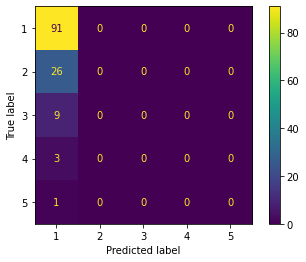

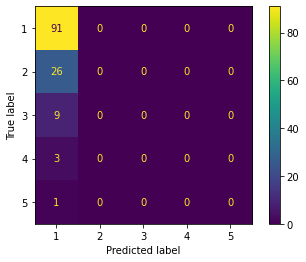

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

model_data = students_por[['Dalc', 'famrel', 'Pstatus', 'guardian']]
col_target = 'Dalc'

target = model_data[col_target].values
data = model_data[['famrel']].values
pstat_onehot = OneHotEncoder().fit_transform(model_data[['Pstatus']].values).toarray()
data = np.append(data, pstat_onehot, axis=1)
guard_onehot = OneHotEncoder().fit_transform(model_data[['guardian']].values).toarray()
data = np.append(data, guard_onehot, axis=1)
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=0)

params_to_try = {'n_neighbors': range(1, 20)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
knn_search.fit(train_data, train_target)

ConfusionMatrixDisplay.from_estimator(estimator=knn_search, X=test_data, y=test_target)
plt.grid(False)

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X=train_data, y=train_target)
baseline_pred = baseline.predict(test_data)

ConfusionMatrixDisplay.from_estimator(estimator=baseline, X=test_data, y=test_target)
plt.grid(False)

accuracy_model = knn_search.score(test_data, test_target)
accuracy_baseline = accuracy_score(test_target, baseline_pred)


# Leave these here to help with grading.
print('Accuracy: ', accuracy_model)
print('best n:', knn_search.best_params_['n_neighbors'])
print('Accuracy Baseline: ', accuracy_baseline)